In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [3]:
df= pd.read_csv("../input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df.shape
print(df.isnull().sum()) # This means there are no rows with empty values
dftrain,dftest= train_test_split(
                                            df,
                                            test_size=0.4,
                                            random_state=42
                                           )

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


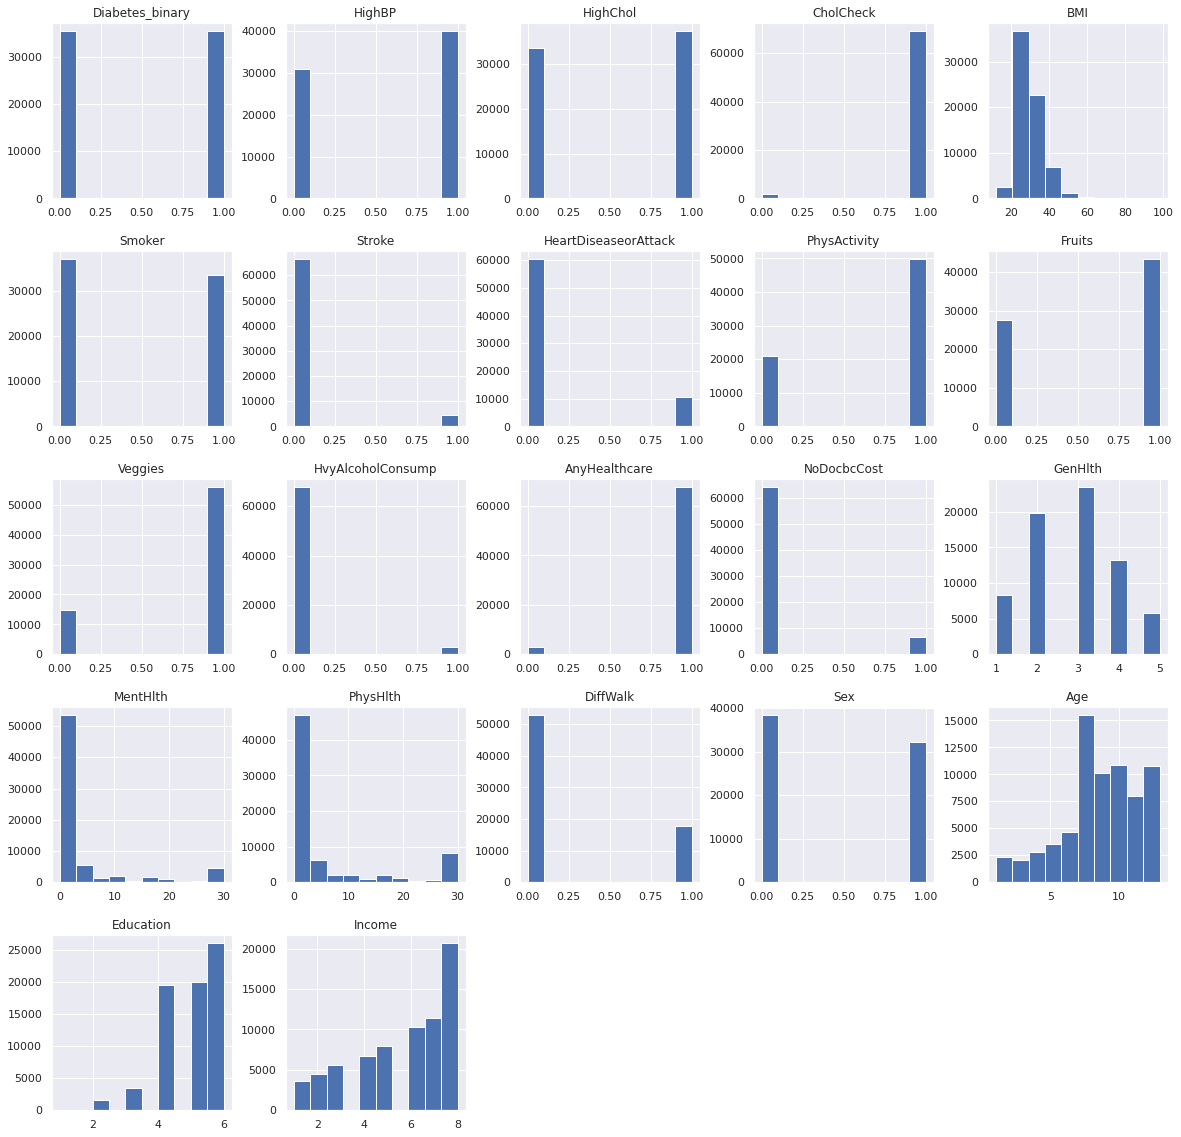

In [4]:
p = df.hist(figsize = (20,20))


In [5]:
#Sampling the data
arr=[]
for i in range(0,5):
    subset = dftrain.sample(frac=0.7,random_state=1,replace=False)
    #print(subset)
    dftrain = dftrain.iloc[np.random.permutation(len(dftrain))]

    arr.append(subset)


In [6]:
arr[2]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
5811,0.0,0.0,1.0,1.0,21.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,2.0,30.0,2.0,0.0,0.0,7.0,6.0,5.0
43212,1.0,1.0,1.0,1.0,36.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,20.0,30.0,1.0,0.0,9.0,4.0,2.0
62086,1.0,1.0,1.0,1.0,41.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,8.0,4.0,5.0
42730,1.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,4.0,7.0
5724,0.0,0.0,0.0,1.0,28.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,12.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47940,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
68777,1.0,1.0,1.0,1.0,39.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,15.0,30.0,1.0,1.0,10.0,4.0,5.0
38277,1.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,3.0,0.0,1.0,0.0,0.0,2.0,5.0,2.0
59812,1.0,0.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,5.0,7.0


In [7]:
arr[3]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
44375,1.0,0.0,0.0,1.0,28.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,15.0,30.0,1.0,0.0,7.0,4.0,8.0
54040,1.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,11.0,4.0,6.0
42281,1.0,0.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,30.0,1.0,1.0,10.0,4.0,8.0
23093,0.0,1.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,12.0,6.0,5.0
5062,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,5.0,2.0,0.0,1.0,13.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48617,1.0,0.0,0.0,1.0,24.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,10.0,4.0,4.0
50901,1.0,1.0,0.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,30.0,1.0,0.0,10.0,6.0,6.0
15771,0.0,1.0,1.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,5.0,15.0,30.0,1.0,1.0,6.0,6.0,8.0
57965,1.0,0.0,1.0,1.0,24.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,30.0,1.0,0.0,13.0,6.0,3.0


In [8]:
models=[]
for i in range  (0,5):
    y= arr[i]['Diabetes_binary']
    x= arr[i].drop(['Diabetes_binary'],axis=1)
    stand= StandardScaler()
    # fit data
    Fit= stand.fit(x)
    # transform data
    x_scaled = Fit.transform(x)
    knn = KNeighborsClassifier()
    #create a dictionary of all values we want to test for n_neighbors
    params_knn = {'n_neighbors': np.arange(1, 25)}
    #use gridsearch to test all values for n_neighbors
    knn_gs = GridSearchCV(knn, params_knn, cv=5)
    #fit model to training data
    knn_gs.fit(x_scaled, y)
    knn_best = knn_gs.best_estimator_
    
    
    models.append([f'knn_{i}',knn_best])


In [9]:
models

[['knn_0', KNeighborsClassifier(n_neighbors=23)],
 ['knn_1', KNeighborsClassifier(n_neighbors=23)],
 ['knn_2', KNeighborsClassifier(n_neighbors=21)],
 ['knn_3', KNeighborsClassifier(n_neighbors=23)],
 ['knn_4', KNeighborsClassifier(n_neighbors=23)]]

In [10]:
#Testdata

ytest= dftrain['Diabetes_binary']
xtest=dftrain.drop(['Diabetes_binary'],axis=1)

for i in range (0,5):
    print(models[i][1])
    print('knn: {}'.format(models[i][1].score(xtest, ytest)))


KNeighborsClassifier(n_neighbors=23)
knn: 0.5920546976305552
KNeighborsClassifier(n_neighbors=23)
knn: 0.5521395732641754
KNeighborsClassifier(n_neighbors=21)
knn: 0.5440528115053637
KNeighborsClassifier(n_neighbors=23)
knn: 0.6246610868796416
KNeighborsClassifier(n_neighbors=23)
knn: 0.4993987975951904


In [11]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(models, voting='hard')
ensemble.fit(x, y)
#test our model on the test data
ensemble.score(xtest, ytest)

0.7414593893669692